# Wuhan Corona Virus Outbreak

- webscraped infected counts from national health commision via wikipedia
- infection counts are fitted to a simple exponential distribution 


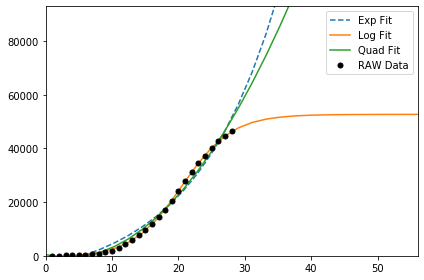

In [3]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from bs4 import BeautifulSoup

%matplotlib inline

url = 'https://en.wikipedia.org/wiki/2019%E2%80%9320_Wuhan_coronavirus_outbreak'
page = requests.get(url).text
soup = BeautifulSoup(page,'lxml')
#print(soup.prettify())
My_table = soup.find('div',{'class':'barbox tright'})

datesfinal = []
countsfinal = []

dates = My_table.findAll('td', colspan = '2', style='padding-right:0.4em; padding-left:0.4em')

for date in dates:
    datesfinal.append((pd.to_datetime(date.get_text())))
    
counts = My_table.findAll('td', colspan = '2', style='min-width:3em;padding-left:0.4em; text-align:right')
'''
for count in counts:
    countsfinal.append(int(count.get_text()[0:count.get_text().find('(')].replace(',',''))) 
'''
for count in counts:
    if count.get_text().find('/') == -1:
        countsfinal.append(int(count.get_text()[0:count.get_text().find('(')].replace(',',''))) 
    else: 
        countsfinal.append(int(count.get_text()[0:count.get_text().find('/')].replace(',',''))) 
    
d=list(zip(datesfinal, countsfinal))
df=pd.DataFrame(data=d, columns=['Date','Infected'])    

def exponential_fit(x, a, b, c):
    return a*np.exp(b*x) + c

#sigmoid is special case of logistic function whereas:
# L = 1, k = 1, X0 = 0
# ref: https://stats.stackexchange.com/questions/204484/what-are-the-differences-between-logistic-function-and-sigmoid-function
'''
def sigmoidal_fit(x, k, x0):
    return (1 / (1 + np.exp(-k*(x-x0))))
'''

def logistic_fit(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

def quadratic_fit(x, a, b, c):
    y = a*(x**2) - (b*x) + c
    return (y)

def tanh_fit(x, eta=1, phi=1):
    y = np.tanh(eta * (x + phi))
    return (y)

x = np.linspace(1,len(df),len(df))
y = np.array(df['Infected'])

# Exponential Fit
fitting_parameters_exp, covariance_exp = curve_fit(exponential_fit, x, y)
a, b, c = fitting_parameters_exp
'''
# Sigmoidal Fit
fitting_parameters_sig, covariance_sig = curve_fit(sigmoidal_fit, x, y, method='dogbox')
a1, b1 = fitting_parameters_sig
'''
# Logistic Fit
p0 = [max(y), np.median(x),1,min(y)] # this is an mandatory initial guess
fitting_parameters_log, covariance_log = curve_fit(logistic_fit, x, y,p0, method='dogbox')
a2, b2, c2, d2 = fitting_parameters_log

# Quadratic Fit
fitting_parameters_quad, covariance_quad = curve_fit(quadratic_fit, x, y)
a3, b3, c3 = fitting_parameters_quad

# Tanh Fit (WIP)
#fitting_parameters_tanh, covariance_tanh = curve_fit(tanh_fit, x, y)
#a4, b4 = fitting_parameters_tanh

x_min = 0 
x_max = len(df)*2
x_fit = np.linspace(x_min, x_max, len(df)) 

plt.plot(x_fit, exponential_fit(x_fit, *fitting_parameters_exp), '--', label='Exp Fit')
# plt.plot(x_fit, sigmoidal_fit(x_fit, *fitting_parameters_sig), '-', label='Sig Fit')
plt.plot(x_fit, logistic_fit(x_fit, *fitting_parameters_log), '-', label='Log Fit')
plt.plot(x_fit, quadratic_fit(x_fit, *fitting_parameters_quad), '-', label='Quad Fit')
#plt.plot(x_fit, tanh_fit(x_fit, *fitting_parameters_tanh), '-', label='Tanh Fit')


plt.plot(x, y, '.', label='RAW Data', color='k', markersize=10)

plt.plot(title='Wuhan')
plt.ylim(0, max(df['Infected'])*2)
plt.xlim(0,len(df)*2)
plt.tight_layout()
plt.legend()

plt.show()

#print(a,b,c)
#print(a1,b1)
#print(a2,b2,c2)
#print(a3,b3,c3)


(0, 30)

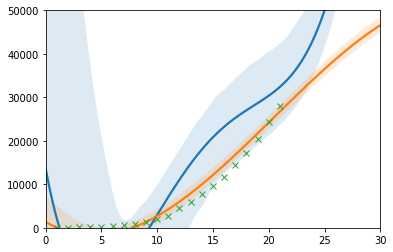

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=x_fit,y=exponential_fit(x_fit, *fitting_parameters_exp),order=4, ci=95, label = 'exponential', scatter_kws=dict(alpha=0),truncate=True)
sns.regplot(x=x_fit,y=sigmoidal_fit(x_fit, *fitting_parameters_sig),order=3, ci=95, label = 'sigmoidal', scatter_kws=dict(alpha=0),truncate=True)
plt.plot(x, y, 'x', label='Wuhan data')

plt.ylim(0, 50000)
plt.xlim(0, 30)



In [196]:
df

,Date,Infected
0,2020-01-16,45
1,2020-01-17,62
2,2020-01-18,121
3,2020-01-19,198
4,2020-01-20,291
5,2020-01-21,440
6,2020-01-22,571
7,2020-01-23,830
8,2020-01-24,1287
9,2020-01-25,1975


In [27]:
x,y

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14.]),
 array([  45,   62,  121,  198,  291,  440,  571,  830, 1287, 1975, 2744,
        4515, 5974, 7711], dtype=int64))

In [28]:
curve_fit(exponential_fit, x, y)

(array([  90.38985879,    0.32142167, -178.90818136]),
 array([[ 5.34061080e+02, -4.19831807e-01, -2.24098069e+03],
        [-4.19831807e-01,  3.32569361e-04,  1.70062255e+00],
        [-2.24098069e+03,  1.70062255e+00,  1.36620364e+04]]))

In [164]:
for count in counts:
    print(count.get_text()[0:count.get_text().find('(')])

 45 
 62 
 121 
 198 
 291 
 440 
 571 
 830 
 1,287 
 1,975 
 2,744 
 4,515 
 5,974 
 7,711 
 9,692 
 11,791 
 14,380 
 17,205 


In [215]:
5**2

25